# Collision tutorial

we'll demonstrate self collision on a baxter robot

## Setup
If you want to check robot's collision, install python-fcl 
And then, import CollisionManager in collision_utils package

In [1]:
import numpy as np

from pykin.robot import Robot
from pykin.kinematics.transform import Transform
from pykin.utils import plot_utils as plt

from pykin.collision.collision_manager import CollisionManager
from pykin.utils.collision_utils import get_robot_collision_geom

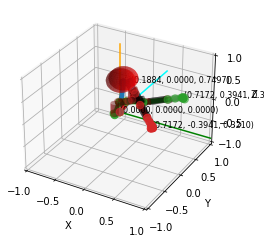

In [2]:
file_path = '../asset/urdf/baxter/baxter.urdf'

robot = Robot(file_path, Transform(rot=[0.0, 0.0, 0.0], pos=[0, 0, 0]))

head_thetas = np.zeros(1)
right_arm_thetas = np.array([np.pi/2, 0, 0, 0, 0, 0, 0])
left_arm_thetas = np.array([-np.pi/2, 0, 0, 0, 0, 0, 0])

thetas = np.hstack((head_thetas, right_arm_thetas, left_arm_thetas))
transformations = robot.kin.forward_kinematics(thetas)

fig, ax = plt.init_3d_figure()
plt.plot_robot(robot, transformations, ax, name="baxter", visible_collision=True)

You can see that both arms of the robot collide with each other.

## Use CollisionManager

Use CollisionManager to check if a conflict has occurred.

In [3]:
collision_manager = CollisionManager()

In [4]:
for link, transformation in transformations.items():
    # get robot link's name and geometry info 
    name, gtype, gparam = get_robot_collision_geom(robot.links[link])
    # get 4x4 size homogeneous transform matrix
    transform = transformation.h_mat
    # add link name, geometry info, transform matrix to collision_manager 
    collision_manager.add_object(name, gtype, gparam, transform)

you can get collision result, contacted object name, fcl contatct_data

In [5]:
result, objs_in_collision, contact_data = collision_manager.in_collision_internal(return_names=True, return_data=True)
print(result, objs_in_collision, contact_data)

True {('left_upper_forearm_visual', 'right_lower_elbow'), ('left_lower_elbow', 'right_lower_elbow'), ('left_upper_forearm_visual', 'right_upper_elbow_visual'), ('left_upper_elbow_visual', 'right_upper_forearm_visual')} [<pykin.collision.collision_manager.ContactData object at 0x7fefd72519b0>, <pykin.collision.collision_manager.ContactData object at 0x7fefd72519e8>, <pykin.collision.collision_manager.ContactData object at 0x7fefd7251a20>, <pykin.collision.collision_manager.ContactData object at 0x7fefd7251a58>]


If you want to check collision check after transform, 
add the link name and transform matrix to the set_transform function.

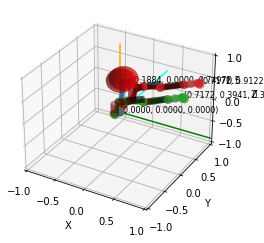

In [6]:
left_arm_thetas = np.array([0, 0, 0, 0, 0, 0, 0])
thetas = np.hstack((head_thetas, right_arm_thetas, left_arm_thetas))
transformations = robot.kin.forward_kinematics(thetas)

for link, transformation in transformations.items():
    name, _, _ = get_robot_collision_geom(robot.links[link])
    transform = transformation.h_mat
    collision_manager.set_transform(name=name, transform=transform)

fig, ax = plt.init_3d_figure()
plt.plot_robot(robot, transformations, ax, name="baxter", visible_collision=True)

You can see that there were no collisions with either arm of the robot.

In [7]:
result, objs_in_collision, contact_data = collision_manager.in_collision_internal(return_names=True, return_data=True)
print(result, objs_in_collision, contact_data)

False No object collided.. []


Because no collision occurred, the collision result was False and objs_in_collision got the text No object collided .